# Selected Country: **Luxembourg**

## Research Questions:
1. How has the relationship between inflation and unemployment evolved in Luxembourg over the past 20 years?
2. How does population life expectancy relate to GDP per capita growth in Luxembourg?
3. How do unemployment rates correlate with emigration patterns in Luxembourg?

## Selected Indicators for EDA Analysis

### Economic Indicators

1. **ei_cphi_m** - Harmonised Index of Consumer Prices
   - **Frequency:** Monthly
   - **Unit:** Growth rate (t/t-12)
   - **Justification:** Measures inflation and purchasing power. Essential for understanding price stability and real economic changes.

2. **namq_10_gdp** - Gross Domestic Product
   - **Frequency:** Quarterly
   - **Unit:** Million EUR
   - **Justification:** Primary measure of economic output and growth. Baseline for comparing all other economic indicators.

3. **nasa_10_nf_tr** - Final Consumption Expenditure
   - **Frequency:** Annual
   - **Unit:** Million EUR
   - **Justification:** Measures actual household and government spending. Links income and prices to economic behavior.

### Labor Market Indicators

4. **une_rt_m** - Unemployment Rate
   - **Frequency:** Monthly
   - **Unit:** Percentage (%)
   - **Justification:** Key indicator of labor market health. Affects household income and migration patterns.

5. **jvs_q_nace2** - Job Vacancy Statistics by NACE Rev. 2 Activity
   - **Frequency:** Quarterly
   - **Unit:** Number of job vacancies (count)
   - **Justification:** Measures labor demand. Reveals skill mismatches and structural economic changes.

### Demographic Indicators

6. **demo_pjangroup** - Population by Age Group and Sex
   - **Frequency:** Annual
   - **Unit:** Number of persons (count)
   - **Justification:** Essential for per-capita calculations and demographic structure analysis. Reveals workforce availability and dependency ratios.

7. **migr_emi2** - Emigration by Age and Sex
   - **Frequency:** Annual
   - **Unit:** Number of persons (count)
   - **Justification:** Captures human capital outflows. Indicates economic push factors and brain drain effects.

8. **migr_imm8** - Immigration by Age Group, Sex and Citizenship
   - **Frequency:** Annual
   - **Unit:** Number of persons (count)
   - **Justification:** Measures labor force additions. Indicates economic attractiveness and impacts housing demand.

9. **demo_mlexpec** - Life Expectancy by Age and Sex
   - **Frequency:** Annual
   - **Unit:** Years
   - **Justification:** Proxy for healthcare quality and development level. Affects pension systems and savings patterns.

10. **demo_gind** - Deaths - Total
    - **Frequency:** Annual
    - **Unit:** Number of deaths (count)
    - **Justification:** Component of natural population change. Critical for understanding demographic dynamics.

### Housing Market Indicator

11. **prc_hpi_q** - House Price Index
    - **Frequency:** Quarterly
    - **Unit:** Index (2010 = 100)
    - **Justification:** Major component of household wealth. Indicates financial stability and consumption through wealth effects.

### External Trade Indicators

12. **namq_10_exi** - Exports of Goods and Services
    - **Frequency:** Quarterly
    - **Unit:** Million EUR
    - **Justification:** Measures international competitiveness. Key GDP component sensitive to global conditions.

13. **namq_10_exi** - Imports of Goods and Services
    - **Frequency:** Quarterly
    - **Unit:** Million EUR 
    - **Justification:** Reflects domestic demand strength. Reveals supply chain dependencies and consumption patterns.

14. **tipsbp40** - Current Account Balance
    - **Frequency:** Quarterly
    - **Unit:** Million EUR
    - **Justification:** Comprehensive external position measure. Indicates economic sustainability and external financing needs.


In [118]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and Preparation

Indicators are stored in .csv files in "data_indicators" folder.

In [119]:
# Import indicators data

path = 'data_indicators/'
termination = '_page_linear_2_0.csv'

inflation = pd.read_csv(path + 'ei_cphi_m'+ termination)
gdp = pd.read_csv(path + 'namq_10_gdp'+ termination)
consumption = pd.read_csv(path + 'nasa_10_nf_tr'+ termination)
unemployment = pd.read_csv(path + 'une_rt_m' + termination)
job_vacancies = pd.read_csv(path + 'jvs_q_nace2'+ termination)
population = pd.read_csv(path + 'demo_pjangroup'+ termination)
emigration = pd.read_csv(path + 'migr_emi2'+ termination)
immigration = pd.read_csv(path + 'migr_imm8'+ termination)
life_expectancy = pd.read_csv(path + 'demo_mlexpec'+ termination)
deaths = pd.read_csv(path + 'demo_gind'+ termination)
house_prices = pd.read_csv(path + 'prc_hpi_q'+ termination)
exports = pd.read_csv(path + 'namq_10_exi'+ '_page_export_linear_2_0.csv')
imports = pd.read_csv(path + 'namq_10_exi'+ '_page_import_linear_2_0.csv')
acc_balance = pd.read_csv(path + 'tipsbp40'+ termination)

indicators = {'inflation': inflation,
              'gdp': gdp,
              'consumption': consumption,
              'unemployment': unemployment,
              'job_vacancies': job_vacancies,
              'population': population,
              'emigration': emigration,
              'immigration': immigration,
              'life_expectancy': life_expectancy,
              'deaths': deaths,
              'house_prices': house_prices,
              'exports': exports,
              'imports': imports,
              'acc_balance': acc_balance}



In [120]:
# Indicators details
indicators_details = {
    "inflation": {
        "code": "ei_cphi_m",
        "name": "Harmonised Index of Consumer Prices",
        "category": "Economic Indicators",
        "frequency": "Monthly",
        "unit": "Growth rate (t/t-12)",
        "justification": "Measures inflation and purchasing power. Essential for understanding price stability and real economic changes."
    },
    "gdp": {
        "code": "namq_10_gdp",
        "name": "Gross Domestic Product",
        "category": "Economic Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Primary measure of economic output and growth. Baseline for comparing all other economic indicators."
    },
    "consumption": {
        "code": "nasa_10_nf_tr",
        "name": "Final Consumption Expenditure",
        "category": "Economic Indicators",
        "frequency": "Annual",
        "unit": "Million EUR",
        "justification": "Measures actual household and government spending. Links income and prices to economic behavior."
    },
    "unemployment": {
        "code": "une_rt_m",
        "name": "Unemployment Rate",
        "category": "Labor Market Indicators",
        "frequency": "Monthly",
        "unit": "Percentage (%)",
        "justification": "Key indicator of labor market health. Affects household income and migration patterns."
    },
    "job_vacancies": {
        "code": "jvs_q_nace2",
        "name": "Job Vacancy Statistics by NACE Rev. 2 Activity",
        "category": "Labor Market Indicators",
        "frequency": "Quarterly",
        "unit": "Number of job vacancies (count)",
        "justification": "Measures labor demand. Reveals skill mismatches and structural economic changes."
    },
    "population": {
        "code": "demo_pjangroup",
        "name": "Population by Age Group and Sex",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of persons (count)",
        "justification": "Essential for per-capita calculations and demographic structure analysis. Reveals workforce availability and dependency ratios."
    },
    "emigration": {
        "code": "migr_emi2",
        "name": "Emigration by Age and Sex",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of persons (count)",
        "justification": "Captures human capital outflows. Indicates economic push factors and brain drain effects."
    },
    "immigration": {
        "code": "migr_imm8",
        "name": "Immigration by Age Group, Sex and Citizenship",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of persons (count)",
        "justification": "Measures labor force additions. Indicates economic attractiveness and impacts housing demand."
    },
    "life_expectancy": {
        "code": "demo_mlexpec",
        "name": "Life Expectancy by Age and Sex",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Years",
        "justification": "Proxy for healthcare quality and development level. Affects pension systems and savings patterns."
    },
    "deaths": {
        "code": "demo_gind",
        "name": "Deaths - Total",
        "category": "Demographic Indicators",
        "frequency": "Annual",
        "unit": "Number of deaths (count)",
        "justification": "Component of natural population change. Critical for understanding demographic dynamics."
    },
    "house_prices": {
        "code": "prc_hpi_q",
        "name": "House Price Index",
        "category": "Housing Market Indicator",
        "frequency": "Quarterly",
        "unit": "Index (2010 = 100)",
        "justification": "Major component of household wealth. Indicates financial stability and consumption through wealth effects."
    },
    "exports": {
        "code": "namq_10_exi",
        "name": "Exports of Goods and Services",
        "category": "External Trade Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Measures international competitiveness. Key GDP component sensitive to global conditions.",
        "file_suffix": "_page_export_linear_2_0.csv"
    },
    "imports": {
        "code": "namq_10_exi",
        "name": "Imports of Goods and Services",
        "category": "External Trade Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Reflects domestic demand strength. Reveals supply chain dependencies and consumption patterns.",
        "file_suffix": "_page_import_linear_2_0.csv"
    },
    "acc_balance": {
        "code": "tipsbp40",
        "name": "Current Account Balance",
        "category": "External Trade Indicators",
        "frequency": "Quarterly",
        "unit": "Million EUR",
        "justification": "Comprehensive external position measure. Indicates economic sustainability and external financing needs."
    }
}

In [121]:
# Remove unnecessary columns
### The only columns we need are 'geo' (Region), 'TIME_PERIOD', 'OBS_VALUE' (Value of the indicator)

indicators_keys = list(indicators.keys())
for i in range(len(indicators_keys)):
    indicators[indicators_keys[i]] = indicators[indicators_keys[i]][['geo', 'TIME_PERIOD', 'OBS_VALUE']]

### Data Cleaning

#### Address common data quality issues: 
 - **Missing Values**: Handle missing values appropriately (imputation, removal, 
etc.). Justify your approach. 
 - **Outliers**: Identify and address outliers if necessary. Explain your outlier 
handling strategy. 
 - **Data Types**: Ensure correct data types for each variable. 
 - **Data Consistency**: Check for inconsistencies in the data


In [122]:
"""
This function standardizes and validates a single indicator dataset by:

Displaying metadata - Shows indicator name, frequency, and unit
Checking missing values - Flags any null data
Standardizing dates - Converts TIME_PERIOD to datetime format (handles Monthly/Quarterly/Annual differently)
Showing statistics - Displays descriptive stats of the values
Detecting outliers - Uses IQR method to find anomalies and visualizes them with a boxplot if found

Output: Returns a cleaned, standardized copy of the dataframe.
"""
def clean_indicator(df, indicator_name, region='LU'):
    # Print indicator details
    print(f"\033[1mCleaning indicator: {indicator_name}")
    print(f"Title: {indicators_details[indicator_name]['name']}")
    print(f"Frequency: {indicators_details[indicator_name]['frequency']}")
    print(f"Unit: {indicators_details[indicator_name]['unit']} \033[0m \n")
    
    # Check if the region exists in the data
    if region not in df['geo'].unique():
        return None
    
    # Filter for specific region
    df = df[df['geo'] == region].copy()
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print(f"❌ Missing values in {indicator_name}:\n{missing_values}\n")
    else:
        print(f"✅ No missing values in {indicator_name}.\n")

    # Fix datetime format
    date_type = indicators_details[indicator_name]['frequency']
    if date_type == 'Monthly':
        df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y-%m').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
    elif date_type == 'Quarterly':
        df['TIME_PERIOD'] = (
        pd.PeriodIndex(df['TIME_PERIOD'].reset_index(drop=True), freq='Q')
        .to_timestamp(how='start')
        .strftime('%Y-%m-01')
        .astype('datetime64[ns]')
    ).values
    elif date_type == 'Annual':
        df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
    
    print(f"✅ TIME_PERIOD format fixed for {indicator_name}.\n")

    # Show basic statistics
    print(f"Basic statistics for {indicator_name}:\n{df.describe()}\n")
    
    # Check data types for TIME_PERIOD and OBS_VALUE
    if not np.issubdtype(df['TIME_PERIOD'].dtype, np.datetime64):
        print(f"❌ TIME_PERIOD is not in datetime format for {indicator_name}.\n")
    
    # Print data type of OBS_VALUE
    print(f"Data type of OBS_VALUE for {indicator_name}: {df['OBS_VALUE'].dtype}\n")

    # Check for outliers using IQR
    Q1 = df['OBS_VALUE'].quantile(0.25)
    Q3 = df['OBS_VALUE'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['OBS_VALUE'] < (Q1 - 1.5 * IQR)) | (df['OBS_VALUE'] > (Q3 + 1.5 * IQR))]
    if outliers.empty:
        print(f"✅ No outliers detected in {indicator_name}.\n")
    else:
        print(f"❌ Outliers in {indicator_name}:\n{outliers}\n")
        
        # Visualize outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='OBS_VALUE', data=df)
        plt.title(f'Boxplot of {indicator_name} to visualize outliers')
        plt.show()
    
    # Rename columns for clarity
    df.rename(columns={'geo': 'Region', 'TIME_PERIOD': 'Date', 'OBS_VALUE': indicator_name}, inplace=True)    
        
    print(f"Finished cleaning {indicator_name}.\n{'-'*50}\n")

    return df

Cleaning indicator: inflation
Title: Harmonised Index of Consumer Prices
Frequency: Monthly
Unit: Growth rate (t/t-12)  

✅ No missing values in inflation.

✅ TIME_PERIOD format fixed for inflation.

Basic statistics for inflation:
                         TIME_PERIOD   OBS_VALUE
count                            345  345.000000
mean   2011-05-02 04:18:46.956521728    2.336812
min              1997-01-01 00:00:00   -1.600000
25%              2004-03-01 00:00:00    1.200000
50%              2011-05-01 00:00:00    2.300000
75%              2018-07-01 00:00:00    3.200000
max              2025-09-01 00:00:00   10.300000
std                              NaN    1.826805

Data type of OBS_VALUE for inflation: float64

❌ Outliers in inflation:
    geo TIME_PERIOD  OBS_VALUE
298  LU  2021-11-01        6.3
301  LU  2022-02-01        7.8
302  LU  2022-03-01        7.9
303  LU  2022-04-01        9.0
304  LU  2022-05-01        9.1
305  LU  2022-06-01       10.3
306  LU  2022-07-01        9.3
307  L

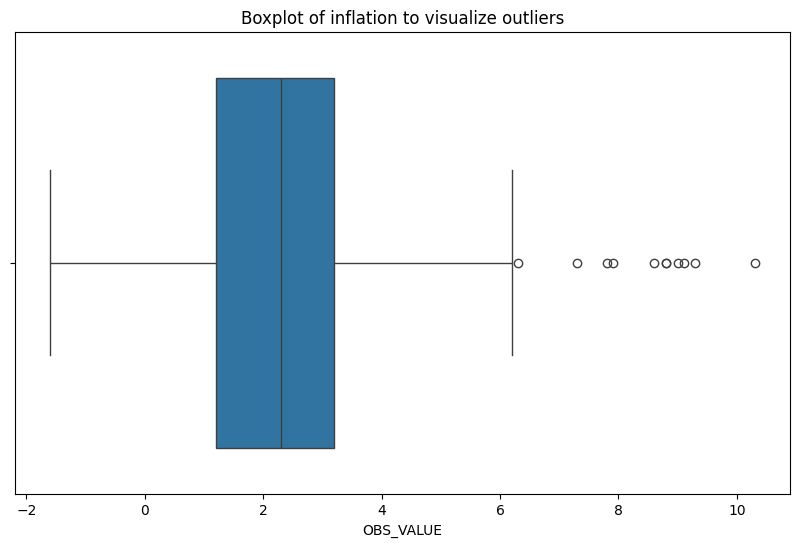

Finished cleaning inflation.
--------------------------------------------------

Cleaning indicator: gdp
Title: Gross Domestic Product
Frequency: Quarterly
Unit: Million EUR  

✅ No missing values in gdp.

✅ TIME_PERIOD format fixed for gdp.

Basic statistics for gdp:
                         TIME_PERIOD     OBS_VALUE
count                            122    122.000000
mean   2010-02-14 18:05:54.098360576  11041.304098
min              1995-01-01 00:00:00   3781.400000
25%              2002-07-24 00:00:00   6371.825000
50%              2010-02-15 00:00:00  10400.750000
75%              2017-09-08 00:00:00  14470.950000
max              2025-04-01 00:00:00  22941.100000
std                              NaN   5269.130419

Data type of OBS_VALUE for gdp: float64

✅ No outliers detected in gdp.

Finished cleaning gdp.
--------------------------------------------------

Cleaning indicator: consumption
Title: Final Consumption Expenditure
Frequency: Annual
Unit: Million EUR  

✅ No missing va

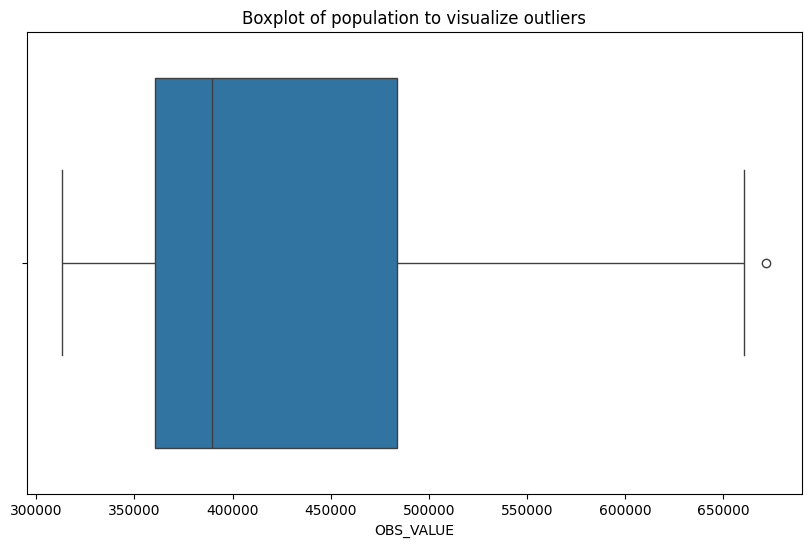

Finished cleaning population.
--------------------------------------------------

Cleaning indicator: emigration
Title: Emigration by Age and Sex
Frequency: Annual
Unit: Number of persons (count)  

✅ No missing values in emigration.

✅ TIME_PERIOD format fixed for emigration.

Basic statistics for emigration:
               TIME_PERIOD     OBS_VALUE
count                   34     34.000000
mean   2006-07-02 12:00:00  10023.147059
min    1990-01-01 00:00:00   5715.000000
25%    1998-04-02 06:00:00   7617.000000
50%    2006-07-02 12:00:00   9216.000000
75%    2014-10-01 18:00:00  12303.750000
max    2023-01-01 00:00:00  17227.000000
std                    NaN   3386.756767

Data type of OBS_VALUE for emigration: int64

✅ No outliers detected in emigration.

Finished cleaning emigration.
--------------------------------------------------

Cleaning indicator: immigration
Title: Immigration by Age Group, Sex and Citizenship
Frequency: Annual
Unit: Number of persons (count)  

✅ No missing 

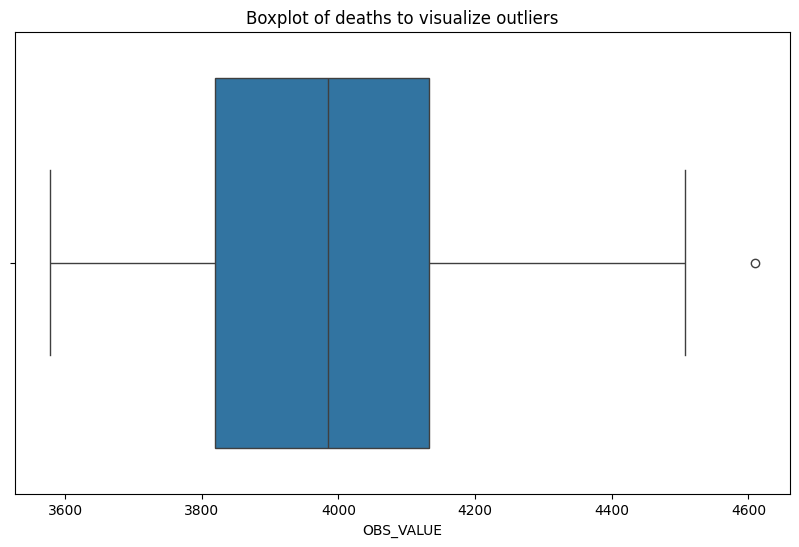

Finished cleaning deaths.
--------------------------------------------------

Cleaning indicator: house_prices
Title: House Price Index
Frequency: Quarterly
Unit: Index (2010 = 100)  

✅ No missing values in house_prices.

✅ TIME_PERIOD format fixed for house_prices.

Basic statistics for house_prices:
                         TIME_PERIOD   OBS_VALUE
count                             74   74.000000
mean   2016-02-15 06:09:43.783783680  145.801757
min              2007-01-01 00:00:00   90.670000
25%              2011-07-24 00:00:00  103.947500
50%              2016-02-15 12:00:00  129.820000
75%              2020-09-08 00:00:00  197.532500
max              2025-04-01 00:00:00  239.950000
std                              NaN   47.231958

Data type of OBS_VALUE for house_prices: float64

✅ No outliers detected in house_prices.

Finished cleaning house_prices.
--------------------------------------------------

Cleaning indicator: exports
Title: Exports of Goods and Services
Frequency: Qua

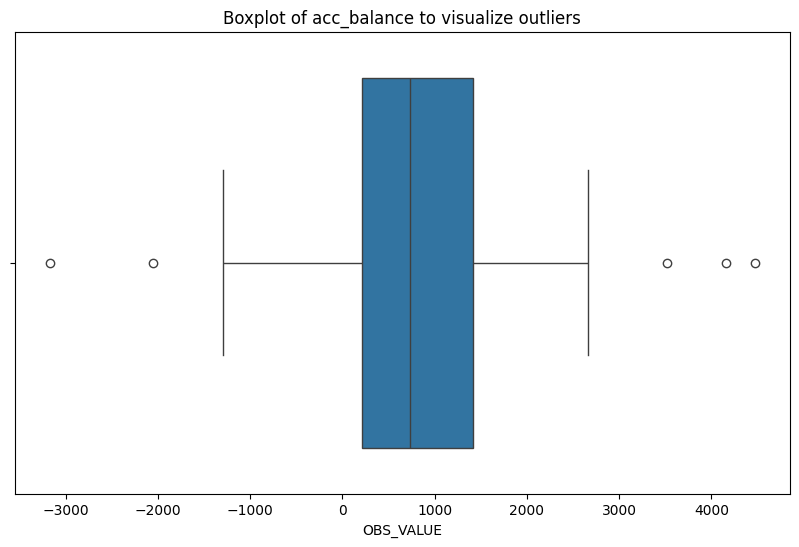

Finished cleaning acc_balance.
--------------------------------------------------



In [123]:
# Clean all indicators saving only for Luxembourg
cleaned_indicators = {}

for key in indicators.keys():
    cleaned_indicators[key] = clean_indicator(indicators[key], key, region='LU')

In [124]:
# Because Job Vacancies and House Prices does not have 20 years of data for Luxembourg, we will drop them from the analysis.
cleaned_indicators.pop('job_vacancies')
cleaned_indicators.pop('house_prices')

,Region,Date,house_prices
0,LU,2007-01-01,90.67
1,LU,2007-04-01,91.29
2,LU,2007-07-01,95.00
3,LU,2007-10-01,94.48
4,LU,2008-01-01,94.05
...,...,...,...
69,LU,2024-04-01,202.66
70,LU,2024-07-01,202.69
71,LU,2024-10-01,204.95
72,LU,2025-01-01,202.82


#### Cleaning Results:
 - No missing values were founded
 - Data Types are correct for each variable
 - Data is consistent
 - Found outliers:
    - **Inflation**: The outlier appeared because of Covid-19 in 2020. This outlier will remain.
    - **Deaths**: The outlier appeared because of Covid-19 in 2020. This outlier will remain.
    - **Population**: It appeared in the last year which indicates a fast increase in population. This outlier will remain.
    - **Account Balance**: Outliers in this dataset are real data points and appeared because high volatility of a small country.

### Data Transformation
 - **Aggregation**: Aggregate data to appropriate time intervals (e.g., annual, 
quarterly) for your analysis. 
 - **Normalization/Standardization**: Consider normalizing or standardizing 
variables if needed for comparison. 
 - **Feature Engineering**: Create new features from existing ones that might be 
relevant to your research questions.

In [125]:
### 1. How has the relationship between inflation and unemployment evolved in Luxembourg over the past 20 years?
# For this question, we will focus on the 'inflation' and 'unemployment' indicators.
# Aggregate the data to monthly frequency
question1 = pd.merge_asof(
    cleaned_indicators['inflation'].sort_values('Date'),
    cleaned_indicators['unemployment'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Filter data for the last 20 years
question1 = question1[question1['Date'] >= '2004-01-01']
question1.tail()

,Region_x,Date,inflation,Region_y,unemployment
340,LU,2025-05-01,2.1,LU,6.4
341,LU,2025-06-01,2.4,LU,6.2
342,LU,2025-07-01,2.6,LU,6.4
343,LU,2025-08-01,2.8,LU,6.3
344,LU,2025-09-01,3.1,LU,6.3


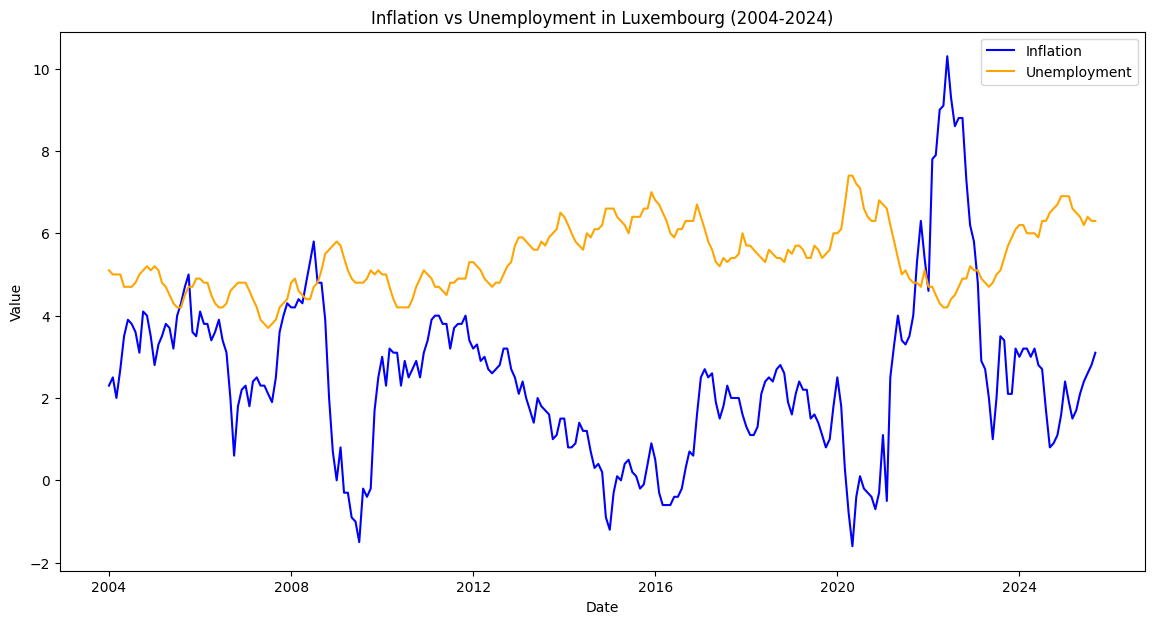

In [126]:
# Visualize the relationship between inflation and unemployment over time
plt.figure(figsize=(14, 7))
plt.plot(question1['Date'], question1['inflation'], label='Inflation', color='blue')
plt.plot(question1['Date'], question1['unemployment'], label='Unemployment', color='orange')
plt.title('Inflation vs Unemployment in Luxembourg (2004-2024)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

The plot reveals a negative correlation between inflation and the unemployment rate, suggesting that periods of higher inflation tend to coincide with lower unemployment levels, but still it is not a strong one.

For a better visualization, the variables need to be transformed in the same range.

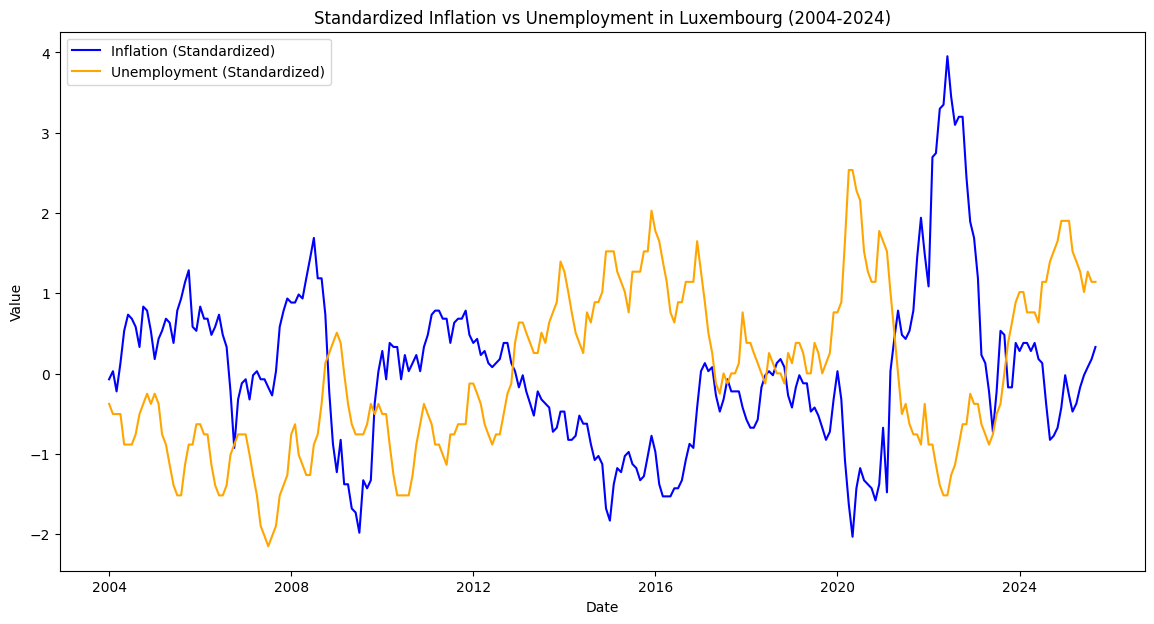

In [127]:
# Normalize the variables for better visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
question1[['inflation_scaled', 'unemployment_scaled']] = scaler.fit_transform(question1[['inflation', 'unemployment']])
# Visualize the standardized relationship between inflation and unemployment over time
plt.figure(figsize=(14, 7))
plt.plot(question1['Date'], question1['inflation_scaled'], label='Inflation (Standardized)', color='blue')
plt.plot(question1['Date'], question1['unemployment_scaled'], label='Unemployment (Standardized)', color='orange')
plt.title('Standardized Inflation vs Unemployment in Luxembourg (2004-2024)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [128]:
### 2. How does population life expectancy relate to GDP per capita growth in Luxembourg?
# For this question, we will focus on the 'life_expectancy', 'gdp', and 'population' indicators.
# Merge life expectancy, GDP, and population data
# Life Expectancy and Population are annual, while GDP is quarterly. We will align them to annual frequency by summerizing GDP to annual.
question2 = pd.merge_asof(
    cleaned_indicators['life_expectancy'].sort_values('Date'),
    cleaned_indicators['population'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Convert quarterly GDP to yearly by summing
gdp_yearly = cleaned_indicators['gdp'].copy()
gdp_yearly['Year'] = gdp_yearly['Date'].dt.year
gdp_yearly = gdp_yearly.groupby('Year')['gdp'].sum().reset_index()
gdp_yearly.rename(columns={'Year': 'Date'}, inplace=True)
gdp_yearly['Date'] = pd.to_datetime(gdp_yearly['Date'], format='%Y').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

# Merge yearly GDP with question2
question2 = pd.merge_asof(
    question2.sort_values('Date'),
    gdp_yearly.sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Calculate GDP per capita
question2['gdp_per_capita'] = question2['gdp'] / question2['population']

question2.tail()


,Region_x,Date,life_expectancy,Region_y,population,gdp,gdp_per_capita
49,LU,2020-01-01,82.2,LU,626108.0,64499.2,0.103016
50,LU,2021-01-01,82.7,LU,634730.0,73039.5,0.115072
51,LU,2022-01-01,83.0,LU,645397.0,76731.2,0.118890
52,LU,2023-01-01,83.4,LU,660809.0,82115.5,0.124265
53,LU,2024-01-01,83.5,LU,672050.0,86180.3,0.128235


In [129]:
question2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region_x         54 non-null     object        
 1   Date             54 non-null     datetime64[ns]
 2   life_expectancy  54 non-null     float64       
 3   Region_y         54 non-null     object        
 4   population       54 non-null     float64       
 5   gdp              30 non-null     float64       
 6   gdp_per_capita   30 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.1+ KB


In [130]:
# The gdp data is for the last 30 years, while life expectancy and population are for the last 54 years.
# So I will filter the data for the last 30 years to have all indicators aligned.
question2 = question2[question2['Date'] >= '1994-01-01']

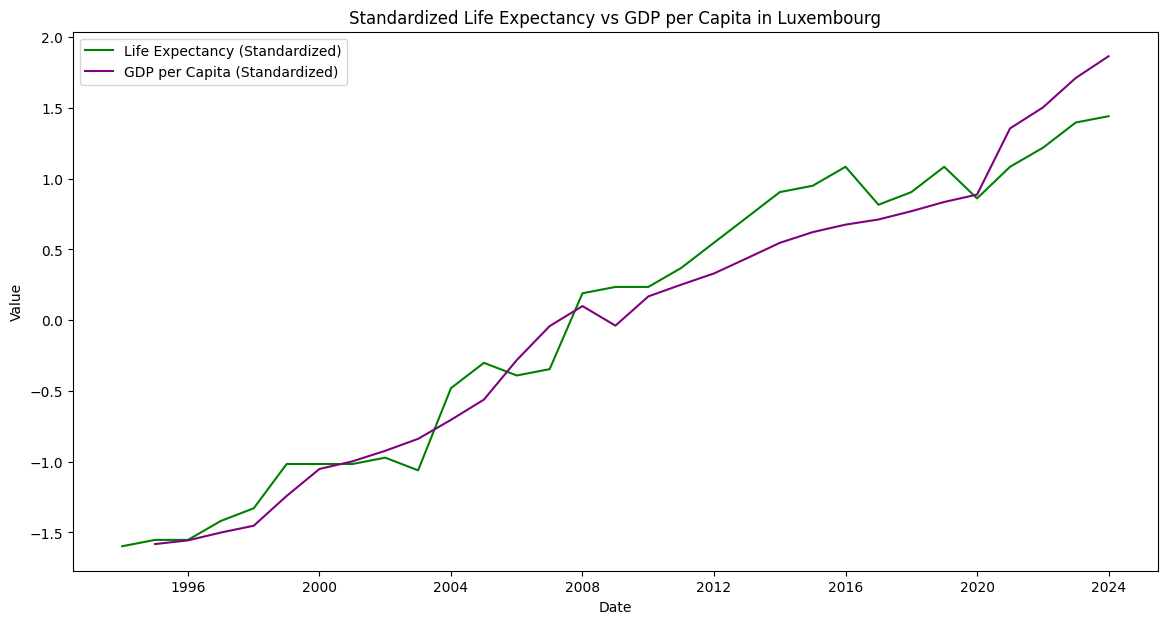

In [131]:
# Because the variables are in different scales, we will normalize them for better visualization.
question2[['life_expectancy_scaled', 'gdp_per_capita_scaled']] = scaler.fit_transform(question2[['life_expectancy', 'gdp_per_capita']])
# Visualize the relationship between life expectancy and GDP per capita over time
plt.figure(figsize=(14, 7))
plt.plot(question2['Date'], question2['life_expectancy_scaled'], label='Life Expectancy (Standardized)', color='green')
plt.plot(question2['Date'], question2['gdp_per_capita_scaled'], label='GDP per Capita (Standardized)', color='purple')
plt.title('Standardized Life Expectancy vs GDP per Capita in Luxembourg')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Both life expectancy and GDP per capita in Luxembourg show a consistent upward trend. This suggests a strong positive relationship between economic prosperity and health outcomes.

In [132]:
### 3. How do unemployment rates correlate with emigration patterns in Luxembourg?
# For this question, we will focus on the 'unemployment' and 'emigration' indicators.
# Merge unemployment and emigration data

# Unemployment is monthly, while emigration is annual. We will align them to annual frequency by taking the average unemployment rate of each year.
unemployment_yearly = cleaned_indicators['unemployment'].copy()

# Filter unemployment data from 1990 match emigration data
unemployment_yearly = unemployment_yearly[unemployment_yearly['Date'] >= '1990-01-01']
unemployment_yearly['Year'] = unemployment_yearly['Date'].dt.year
unemployment_yearly = unemployment_yearly.groupby('Year')['unemployment'].mean().reset_index()
unemployment_yearly.rename(columns={'Year': 'Date'}, inplace=True)
unemployment_yearly['Date'] = pd.to_datetime(unemployment_yearly['Date'], format='%Y').dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

question3 = pd.merge_asof(
    unemployment_yearly.sort_values('Date'),
    cleaned_indicators['emigration'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

# Merge population data
question3 = pd.merge_asof(
    question3.sort_values('Date'),
    cleaned_indicators['population'].sort_values('Date'),
    on=['Date'],
    direction='backward'
)

question3.head()


,Date,unemployment,Region_x,emigration,Region_y,population
0,1990-01-01,1.658333,LU,6339,LU,379300.0
1,1991-01-01,1.658333,LU,6740,LU,384400.0
2,1992-01-01,2.066667,LU,6440,LU,389600.0
3,1993-01-01,2.583333,LU,5826,LU,394750.0
4,1994-01-01,3.175000,LU,6141,LU,400200.0


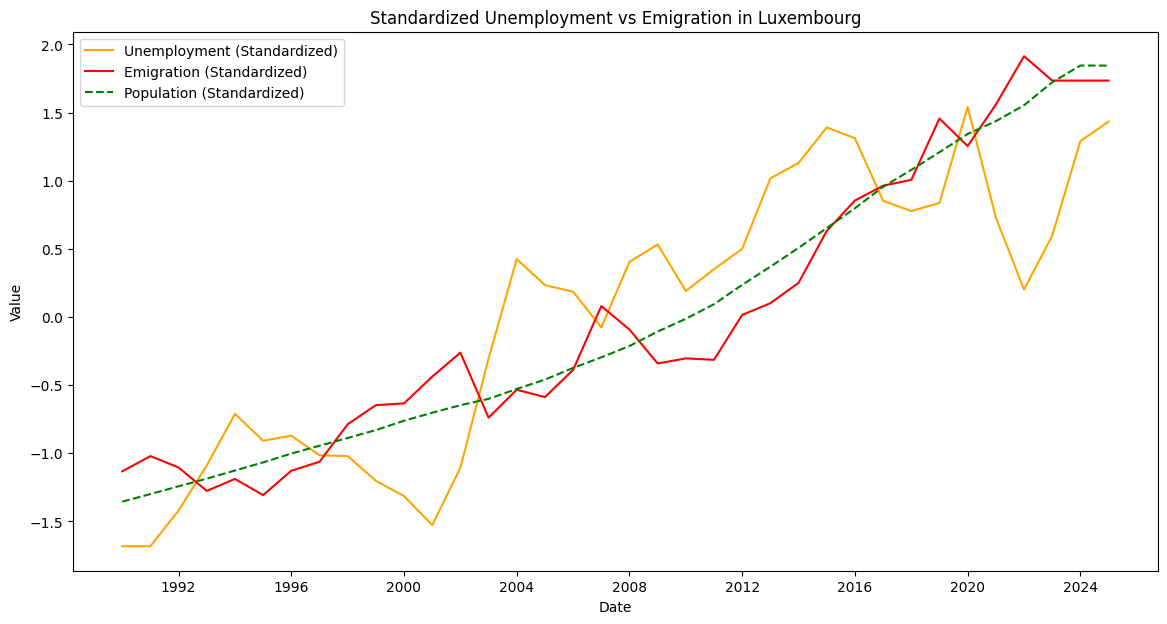

In [133]:
# Because unemployment rate is in percentage and emigration is in count, we will normalize them for better visualization.
question3[['unemployment_scaled', 'emigration_scaled', 'population_scaled']] = scaler.fit_transform(question3[['unemployment', 'emigration', 'population']])

# Visualize the relationship between unemployment and emigration over time
plt.figure(figsize=(14, 7))
plt.plot(question3['Date'], question3['unemployment_scaled'], label='Unemployment (Standardized)', color='orange')
plt.plot(question3['Date'], question3['emigration_scaled'], label='Emigration (Standardized)', color='red')
plt.plot(question3['Date'], question3['population_scaled'], label='Population (Standardized)', color='green', linestyle='--')
plt.title('Standardized Unemployment vs Emigration in Luxembourg')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

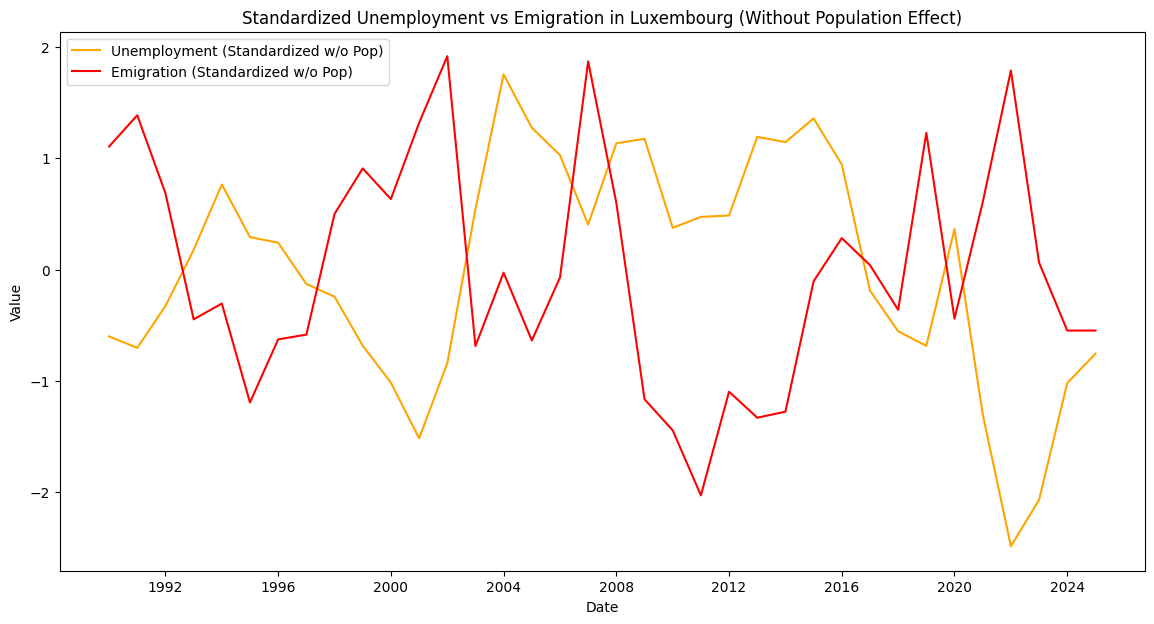

In [134]:
# Analysis of Unemployment and Emigration by substracting population effect
question3['unemployment_scaled_wo_pop'] = question3['unemployment_scaled'] - question3['population_scaled']
question3['emigration_scaled_wo_pop'] = question3['emigration_scaled'] - question3['population_scaled']

# Scale again after substraction
question3[['unemployment_scaled_wo_pop', 'emigration_scaled_wo_pop']] = scaler.fit_transform(question3[['unemployment_scaled_wo_pop', 'emigration_scaled_wo_pop']])

# Visualize the relationship between unemployment and emigration over time without population effect
plt.figure(figsize=(14, 7))
plt.plot(question3['Date'], question3['unemployment_scaled_wo_pop'], label='Unemployment (Standardized w/o Pop)', color='orange')
plt.plot(question3['Date'], question3['emigration_scaled_wo_pop'], label='Emigration (Standardized w/o Pop)', color='red')
plt.title('Standardized Unemployment vs Emigration in Luxembourg (Without Population Effect)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

It looks like there is a negative relationship between Unemployment and Emigration. But there is a but. Between 2010 and 2016 there is not a visible correlation which might mean that Luxembourg had a good management of population.

### Exploratory Data Analysis (EDA) & Visualization (40% of Grade) 
 - Univariate Analysis: Explore the distribution of each selected indicator individually 
using appropriate descriptive statistics and visualizations (histograms, box plots, 
density plots). 
 - Bivariate Analysis: Investigate relationships between pairs of indicators using: 
    - Scatter Plots: Visualize correlations. 
    - Correlation: Calculate and visualize correlation between variables. 
    - Time Series Plots: Analyze trends over time for individual indicators and 
combinations. 
 - Multivariate Analysis (Optional): If appropriate, explore relationships between 
multiple indicators using techniques like: 
    - Pair Plots: Visualize pairwise relationships among several variables. 
    - Heatmaps: Display correlation matrices or other multivariate data. 
    - Visualization Best Practices: Create clear, informative, and visually appealing 
visualizations with appropriate labels, titles, and legends. Use color effectively to 
highlight key findings. 
 - Interpretation: Provide insightful interpretations of your EDA results. What patterns, 
trends, anomalies, or relationships did you discover? 